<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [5]</a>'.</span>

In [1]:
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from Bio import SeqIO

sns.set(style='white')

In [2]:
'''
make a df: distance vs attribution codon wise (with and without absolute values)
'''
record_tr = []
sequence = []

for record in SeqIO.parse("/net/lts2gdk0/mnt/scratch/lts2/nallapar/rb-prof/data/Jan_2024/Lina/reference/ensembl.cds.fa", "fasta"):
    record_tr.append(str(record.description.split(' ')[0]))
    sequence.append(str(record.seq))

# make df
df = pd.DataFrame({'Transcript': record_tr, 'Sequence': sequence})

print("Made Transcript-Sequence DF")

# convert sequence into codon triplets list
df['Codon'] = df['Sequence'].apply(lambda x: [x[i:i+3] for i in range(0, len(x), 3)])

df_test = pd.read_csv('predictions/exp_dat_testLiver.csv')
test_tr = list(df_test['transcript'])

int_ds = h5py.File('/net/lts2gdk0/mnt/scratch/lts2/nallapar/rb-prof/data/Jan_2024/Lina/full_Test_LIXG_RiboGL.h5', 'r')
len_samples = len(int_ds['node_attr'])
int_tr = list(int_ds['transcript'])

codon = []
distance_ASite = []
attribution_vals = []
attribution_abs = []

for i in tqdm(range(len_samples)):
    node_attr_sample = int_ds['node_attr'][i]
    # num codons is square root of length of node_attr_sample
    num_codons = int(len(node_attr_sample)**0.5)
    # convert to 2D array of shape (num_codons, num_codons)
    node_attr_sample = node_attr_sample.reshape(num_codons, num_codons)
    # get codon sequence for this transcript
    codon_seq = df[df['Transcript'] == str(int_tr[i].decode('utf-8'))]['Codon'].values[0]

    for j in range(num_codons):
        sample_attr = node_attr_sample[j] / np.max(np.abs(node_attr_sample[j]))
        sample_attr_mod = np.abs(node_attr_sample[j]) / np.max(np.abs(node_attr_sample[j]))
        for k in range(num_codons):
            attribution_vals.append(sample_attr[k])
            attribution_abs.append(sample_attr_mod[k])
            distance_ASite.append(k-j)
            codon.append(codon_seq[k])

data = {'Distance from A Site': distance_ASite, 'Attribution Normal': attribution_vals, 'Attribution Mod': attribution_abs, 'Codon': codon}
df_distCodonAttr = pd.DataFrame(data)

df_distCodonAttr.to_csv('final_plots/distCodonAttr.csv')

print("Saved DF with Distance from A Site vs Attribution (Normal and Mod) for each Codon")

Made Transcript-Sequence DF


  0%|          | 0/1284 [00:00<?, ?it/s]

  0%|          | 1/1284 [00:00<04:32,  4.71it/s]

  0%|          | 3/1284 [00:00<03:24,  6.26it/s]

  0%|          | 4/1284 [00:00<04:03,  5.26it/s]

  0%|          | 5/1284 [00:01<05:20,  3.99it/s]

  0%|          | 6/1284 [00:01<06:52,  3.10it/s]

  1%|          | 8/1284 [00:01<04:27,  4.77it/s]

  1%|          | 12/1284 [00:01<02:23,  8.88it/s]

  1%|          | 14/1284 [00:02<03:21,  6.29it/s]

  1%|          | 16/1284 [00:02<02:41,  7.84it/s]

  1%|▏         | 18/1284 [00:03<03:59,  5.29it/s]

  2%|▏         | 20/1284 [00:03<03:10,  6.65it/s]

  2%|▏         | 22/1284 [00:03<02:32,  8.29it/s]

  2%|▏         | 24/1284 [00:04<03:46,  5.56it/s]

  2%|▏         | 26/1284 [00:04<03:08,  6.67it/s]

  2%|▏         | 28/1284 [00:04<02:44,  7.66it/s]

  2%|▏         | 30/1284 [00:04<02:28,  8.44it/s]

  2%|▏         | 32/1284 [00:04<02:22,  8.78it/s]

  3%|▎         | 34/1284 [00:05<03:16,  6.37it/s]

  3%|▎         | 38/1284 [00:05<02:22,  8.74it/s]

  3%|▎         | 40/1284 [00:05<02:29,  8.35it/s]

  3%|▎         | 42/1284 [00:06<02:11,  9.45it/s]

  3%|▎         | 44/1284 [00:06<03:45,  5.50it/s]

  4%|▎         | 46/1284 [00:06<03:04,  6.71it/s]

  4%|▎         | 48/1284 [00:07<02:35,  7.92it/s]

  4%|▍         | 50/1284 [00:07<02:10,  9.47it/s]

  4%|▍         | 52/1284 [00:07<02:09,  9.49it/s]

  4%|▍         | 54/1284 [00:07<03:01,  6.77it/s]

  4%|▍         | 57/1284 [00:07<02:09,  9.50it/s]

  5%|▍         | 60/1284 [00:08<01:43, 11.78it/s]

  5%|▍         | 62/1284 [00:08<01:41, 12.00it/s]

  5%|▍         | 64/1284 [00:08<02:25,  8.38it/s]

  5%|▌         | 66/1284 [00:09<03:27,  5.87it/s]

  5%|▌         | 67/1284 [00:09<03:39,  5.54it/s]

  5%|▌         | 70/1284 [00:09<02:27,  8.24it/s]

  6%|▌         | 73/1284 [00:10<02:57,  6.81it/s]

  6%|▌         | 75/1284 [00:10<02:32,  7.91it/s]

  6%|▌         | 77/1284 [00:10<02:54,  6.92it/s]

  6%|▌         | 79/1284 [00:10<02:25,  8.25it/s]

  6%|▋         | 81/1284 [00:11<02:16,  8.82it/s]

  6%|▋         | 83/1284 [00:11<02:28,  8.11it/s]

  7%|▋         | 85/1284 [00:11<02:47,  7.14it/s]

  7%|▋         | 86/1284 [00:12<03:30,  5.68it/s]

  7%|▋         | 87/1284 [00:12<03:27,  5.77it/s]

  7%|▋         | 88/1284 [00:12<04:06,  4.86it/s]

  7%|▋         | 89/1284 [00:12<03:52,  5.13it/s]

  7%|▋         | 90/1284 [00:12<03:29,  5.69it/s]

  7%|▋         | 91/1284 [00:13<04:02,  4.92it/s]

  7%|▋         | 94/1284 [00:13<02:43,  7.28it/s]

  8%|▊         | 97/1284 [00:13<01:59,  9.90it/s]

  8%|▊         | 99/1284 [00:13<01:49, 10.82it/s]

  8%|▊         | 102/1284 [00:13<01:52, 10.48it/s]

  8%|▊         | 104/1284 [00:14<02:15,  8.70it/s]

  8%|▊         | 105/1284 [00:14<02:43,  7.22it/s]

  8%|▊         | 108/1284 [00:14<01:59,  9.83it/s]

  9%|▊         | 110/1284 [00:14<02:00,  9.73it/s]

  9%|▊         | 112/1284 [00:15<02:20,  8.35it/s]

  9%|▉         | 113/1284 [00:15<02:17,  8.54it/s]

  9%|▉         | 114/1284 [00:15<03:09,  6.18it/s]

  9%|▉         | 115/1284 [00:15<03:36,  5.41it/s]

  9%|▉         | 116/1284 [00:16<03:33,  5.46it/s]

  9%|▉         | 117/1284 [00:16<03:25,  5.68it/s]

  9%|▉         | 119/1284 [00:16<04:12,  4.62it/s]

  9%|▉         | 121/1284 [00:16<03:01,  6.42it/s]

 10%|▉         | 122/1284 [00:17<02:53,  6.71it/s]

 10%|▉         | 123/1284 [00:17<03:08,  6.17it/s]

 10%|▉         | 125/1284 [00:17<02:25,  7.94it/s]

 10%|▉         | 127/1284 [00:17<02:27,  7.87it/s]

 10%|▉         | 128/1284 [00:17<02:40,  7.18it/s]

 10%|█         | 129/1284 [00:17<02:31,  7.63it/s]

 10%|█         | 131/1284 [00:18<02:56,  6.52it/s]

 10%|█         | 133/1284 [00:18<02:17,  8.35it/s]

 11%|█         | 136/1284 [00:18<01:37, 11.79it/s]

 11%|█         | 138/1284 [00:19<02:55,  6.53it/s]

 11%|█         | 140/1284 [00:19<02:43,  6.99it/s]

 11%|█         | 142/1284 [00:19<02:31,  7.53it/s]

 11%|█         | 144/1284 [00:20<03:31,  5.38it/s]

 11%|█▏        | 146/1284 [00:20<02:48,  6.75it/s]

 12%|█▏        | 148/1284 [00:20<02:16,  8.34it/s]

 12%|█▏        | 150/1284 [00:20<02:51,  6.62it/s]

 12%|█▏        | 152/1284 [00:21<03:11,  5.92it/s]

 12%|█▏        | 153/1284 [00:21<03:06,  6.08it/s]

 12%|█▏        | 154/1284 [00:21<03:54,  4.82it/s]

 12%|█▏        | 155/1284 [00:22<03:41,  5.09it/s]

 12%|█▏        | 156/1284 [00:22<03:41,  5.10it/s]

 12%|█▏        | 158/1284 [00:22<02:52,  6.53it/s]

 13%|█▎        | 161/1284 [00:22<01:49, 10.22it/s]

 13%|█▎        | 163/1284 [00:22<01:54,  9.78it/s]

 13%|█▎        | 166/1284 [00:22<01:35, 11.71it/s]

 13%|█▎        | 170/1284 [00:23<01:12, 15.37it/s]

 13%|█▎        | 172/1284 [00:23<01:10, 15.85it/s]

 14%|█▎        | 174/1284 [00:23<02:07,  8.73it/s]

 14%|█▍        | 177/1284 [00:23<01:48, 10.16it/s]

 14%|█▍        | 179/1284 [00:24<02:13,  8.28it/s]

 14%|█▍        | 181/1284 [00:24<01:53,  9.76it/s]

 14%|█▍        | 183/1284 [00:24<01:44, 10.53it/s]

 14%|█▍        | 185/1284 [00:24<01:49, 10.05it/s]

 15%|█▍        | 188/1284 [00:24<01:28, 12.45it/s]

 15%|█▍        | 191/1284 [00:25<01:47, 10.14it/s]

 15%|█▌        | 194/1284 [00:25<01:25, 12.74it/s]

 15%|█▌        | 196/1284 [00:25<01:33, 11.70it/s]

 15%|█▌        | 199/1284 [00:26<02:06,  8.59it/s]

 16%|█▌        | 201/1284 [00:26<02:53,  6.26it/s]

 16%|█▌        | 202/1284 [00:27<03:30,  5.15it/s]

 16%|█▌        | 203/1284 [00:27<03:29,  5.17it/s]

 16%|█▌        | 204/1284 [00:27<03:44,  4.82it/s]

 16%|█▌        | 206/1284 [00:27<02:50,  6.31it/s]

 16%|█▌        | 207/1284 [00:27<02:51,  6.29it/s]

 16%|█▌        | 208/1284 [00:28<02:46,  6.48it/s]

 16%|█▋        | 209/1284 [00:28<02:53,  6.18it/s]

 16%|█▋        | 211/1284 [00:28<02:59,  5.98it/s]

 17%|█▋        | 214/1284 [00:28<02:15,  7.90it/s]

 17%|█▋        | 216/1284 [00:28<01:50,  9.70it/s]

 17%|█▋        | 218/1284 [00:29<01:52,  9.51it/s]

 17%|█▋        | 220/1284 [00:29<01:58,  9.01it/s]

 17%|█▋        | 222/1284 [00:29<02:27,  7.18it/s]

 17%|█▋        | 224/1284 [00:29<02:08,  8.27it/s]

 18%|█▊        | 225/1284 [00:30<02:30,  7.02it/s]

 18%|█▊        | 227/1284 [00:30<02:07,  8.29it/s]

 18%|█▊        | 228/1284 [00:30<02:31,  6.99it/s]

 18%|█▊        | 230/1284 [00:30<01:55,  9.09it/s]

 18%|█▊        | 232/1284 [00:30<01:35, 10.98it/s]

 18%|█▊        | 234/1284 [00:31<02:07,  8.25it/s]

 18%|█▊        | 236/1284 [00:31<01:50,  9.44it/s]

 19%|█▊        | 238/1284 [00:31<01:49,  9.58it/s]

 19%|█▊        | 240/1284 [00:32<02:32,  6.85it/s]

 19%|█▉        | 242/1284 [00:32<02:05,  8.29it/s]

 19%|█▉        | 244/1284 [00:32<03:01,  5.72it/s]

 19%|█▉        | 245/1284 [00:32<03:02,  5.70it/s]

 19%|█▉        | 246/1284 [00:33<02:46,  6.23it/s]

 19%|█▉        | 248/1284 [00:33<02:04,  8.31it/s]

 19%|█▉        | 250/1284 [00:33<02:30,  6.89it/s]

 20%|█▉        | 252/1284 [00:33<02:10,  7.88it/s]

 20%|█▉        | 255/1284 [00:33<01:37, 10.58it/s]

 20%|██        | 257/1284 [00:34<01:33, 11.00it/s]

 20%|██        | 259/1284 [00:34<01:21, 12.51it/s]

 20%|██        | 261/1284 [00:34<01:18, 12.96it/s]

 20%|██        | 263/1284 [00:34<01:44,  9.74it/s]

 21%|██        | 265/1284 [00:34<01:36, 10.55it/s]

 21%|██        | 267/1284 [00:34<01:40, 10.08it/s]

 21%|██        | 271/1284 [00:35<01:19, 12.77it/s]

 21%|██▏       | 273/1284 [00:35<01:46,  9.53it/s]

 21%|██▏       | 275/1284 [00:35<01:46,  9.49it/s]

 22%|██▏       | 277/1284 [00:36<02:27,  6.82it/s]

 22%|██▏       | 278/1284 [00:36<02:26,  6.88it/s]

 22%|██▏       | 280/1284 [00:36<02:04,  8.07it/s]

 22%|██▏       | 282/1284 [00:36<01:43,  9.67it/s]

 22%|██▏       | 284/1284 [00:37<02:14,  7.43it/s]

 22%|██▏       | 286/1284 [00:37<02:48,  5.91it/s]

 22%|██▏       | 288/1284 [00:37<02:41,  6.15it/s]

 23%|██▎       | 289/1284 [00:38<03:41,  4.50it/s]

 23%|██▎       | 290/1284 [00:38<03:27,  4.79it/s]

 23%|██▎       | 291/1284 [00:38<03:28,  4.77it/s]

 23%|██▎       | 292/1284 [00:39<03:55,  4.22it/s]

 23%|██▎       | 293/1284 [00:39<03:57,  4.17it/s]

 23%|██▎       | 295/1284 [00:39<02:48,  5.86it/s]

 23%|██▎       | 296/1284 [00:39<03:07,  5.26it/s]

 23%|██▎       | 297/1284 [00:39<02:47,  5.89it/s]

 23%|██▎       | 299/1284 [00:39<01:59,  8.24it/s]

 23%|██▎       | 301/1284 [00:40<02:01,  8.08it/s]

 24%|██▎       | 302/1284 [00:40<02:45,  5.94it/s]

 24%|██▎       | 304/1284 [00:40<02:23,  6.85it/s]

 24%|██▍       | 308/1284 [00:40<01:33, 10.47it/s]

 24%|██▍       | 310/1284 [00:41<01:23, 11.64it/s]

 24%|██▍       | 313/1284 [00:41<01:05, 14.92it/s]

 25%|██▍       | 315/1284 [00:41<01:38,  9.88it/s]

 25%|██▍       | 317/1284 [00:41<01:30, 10.68it/s]

 25%|██▍       | 319/1284 [00:41<01:24, 11.43it/s]

 25%|██▌       | 321/1284 [00:42<01:21, 11.81it/s]

 25%|██▌       | 323/1284 [00:42<01:15, 12.69it/s]

 25%|██▌       | 325/1284 [00:42<01:37,  9.89it/s]

 26%|██▌       | 328/1284 [00:42<01:27, 10.88it/s]

 26%|██▌       | 330/1284 [00:42<01:34, 10.07it/s]

 26%|██▌       | 332/1284 [00:43<01:46,  8.97it/s]

 26%|██▌       | 335/1284 [00:43<01:51,  8.48it/s]

 26%|██▌       | 336/1284 [00:43<01:50,  8.58it/s]

 26%|██▋       | 338/1284 [00:44<02:33,  6.16it/s]

 26%|██▋       | 339/1284 [00:44<02:52,  5.48it/s]

 26%|██▋       | 340/1284 [00:44<03:24,  4.61it/s]

 27%|██▋       | 343/1284 [00:45<02:12,  7.11it/s]

 27%|██▋       | 345/1284 [00:45<01:46,  8.78it/s]

 27%|██▋       | 347/1284 [00:45<02:12,  7.06it/s]

 27%|██▋       | 349/1284 [00:46<03:19,  4.70it/s]

 27%|██▋       | 351/1284 [00:46<03:24,  4.55it/s]

 27%|██▋       | 352/1284 [00:46<03:22,  4.60it/s]

 27%|██▋       | 353/1284 [00:47<03:31,  4.40it/s]

 28%|██▊       | 355/1284 [00:47<02:44,  5.66it/s]

 28%|██▊       | 356/1284 [00:47<03:16,  4.72it/s]

 28%|██▊       | 358/1284 [00:47<02:32,  6.08it/s]

 28%|██▊       | 360/1284 [00:48<02:26,  6.31it/s]

 28%|██▊       | 361/1284 [00:48<03:08,  4.89it/s]

 28%|██▊       | 362/1284 [00:48<03:43,  4.12it/s]

 28%|██▊       | 364/1284 [00:49<03:02,  5.05it/s]

 29%|██▊       | 366/1284 [00:49<02:45,  5.54it/s]

 29%|██▊       | 367/1284 [00:49<02:39,  5.77it/s]

 29%|██▊       | 368/1284 [00:49<02:35,  5.88it/s]

 29%|██▊       | 369/1284 [00:50<02:36,  5.85it/s]

 29%|██▉       | 370/1284 [00:50<02:37,  5.82it/s]

 29%|██▉       | 371/1284 [00:50<03:05,  4.93it/s]

 29%|██▉       | 372/1284 [00:50<03:12,  4.73it/s]

 29%|██▉       | 374/1284 [00:51<03:18,  4.59it/s]

 29%|██▉       | 377/1284 [00:51<02:44,  5.51it/s]

 30%|██▉       | 379/1284 [00:51<02:12,  6.85it/s]

 30%|██▉       | 381/1284 [00:51<01:59,  7.55it/s]

 30%|██▉       | 384/1284 [00:52<01:34,  9.54it/s]

 30%|███       | 386/1284 [00:52<02:09,  6.95it/s]

 30%|███       | 387/1284 [00:52<02:15,  6.62it/s]

 30%|███       | 388/1284 [00:52<02:17,  6.53it/s]

 30%|███       | 389/1284 [00:53<03:20,  4.45it/s]

 30%|███       | 390/1284 [00:53<03:49,  3.89it/s]

 31%|███       | 392/1284 [00:53<02:47,  5.33it/s]

 31%|███       | 393/1284 [00:54<04:20,  3.42it/s]

 31%|███       | 394/1284 [00:55<05:46,  2.57it/s]

 31%|███       | 396/1284 [00:55<03:49,  3.87it/s]

 31%|███       | 397/1284 [00:55<04:37,  3.19it/s]

 31%|███       | 398/1284 [00:56<03:53,  3.79it/s]

 31%|███       | 401/1284 [00:56<02:27,  5.98it/s]

 31%|███▏      | 403/1284 [00:56<02:08,  6.83it/s]

 31%|███▏      | 404/1284 [00:56<02:04,  7.07it/s]

 32%|███▏      | 406/1284 [00:56<01:48,  8.13it/s]

 32%|███▏      | 407/1284 [00:57<02:49,  5.16it/s]

 32%|███▏      | 409/1284 [00:57<02:11,  6.64it/s]

 32%|███▏      | 410/1284 [00:57<02:29,  5.84it/s]

 32%|███▏      | 411/1284 [00:58<03:46,  3.86it/s]

 32%|███▏      | 413/1284 [00:58<02:36,  5.55it/s]

 32%|███▏      | 414/1284 [00:58<02:28,  5.86it/s]

 32%|███▏      | 415/1284 [00:58<02:32,  5.69it/s]

 32%|███▏      | 416/1284 [00:59<03:01,  4.79it/s]

 32%|███▏      | 417/1284 [00:59<03:12,  4.50it/s]

 33%|███▎      | 418/1284 [00:59<04:14,  3.41it/s]

 33%|███▎      | 419/1284 [00:59<03:52,  3.72it/s]

 33%|███▎      | 421/1284 [01:00<02:38,  5.43it/s]

 33%|███▎      | 422/1284 [01:00<02:57,  4.85it/s]

 33%|███▎      | 423/1284 [01:00<02:56,  4.89it/s]

 33%|███▎      | 426/1284 [01:00<02:13,  6.42it/s]

 33%|███▎      | 427/1284 [01:01<02:39,  5.37it/s]

 33%|███▎      | 429/1284 [01:01<02:00,  7.12it/s]

 33%|███▎      | 430/1284 [01:01<02:27,  5.77it/s]

 34%|███▎      | 431/1284 [01:01<02:18,  6.18it/s]

 34%|███▎      | 432/1284 [01:01<02:13,  6.37it/s]

 34%|███▎      | 433/1284 [01:02<03:17,  4.31it/s]

 34%|███▍      | 436/1284 [01:02<02:31,  5.60it/s]

 34%|███▍      | 439/1284 [01:03<02:31,  5.57it/s]

 34%|███▍      | 440/1284 [01:03<03:32,  3.97it/s]

 34%|███▍      | 442/1284 [01:04<02:44,  5.11it/s]

 35%|███▍      | 443/1284 [01:04<03:21,  4.18it/s]

 35%|███▍      | 445/1284 [01:04<03:16,  4.26it/s]

 35%|███▍      | 447/1284 [01:05<02:44,  5.10it/s]

 35%|███▍      | 449/1284 [01:05<02:06,  6.58it/s]

 35%|███▌      | 450/1284 [01:05<02:15,  6.15it/s]

 35%|███▌      | 452/1284 [01:05<01:45,  7.86it/s]

 35%|███▌      | 454/1284 [01:05<01:43,  8.03it/s]

 35%|███▌      | 455/1284 [01:06<02:16,  6.10it/s]

 36%|███▌      | 457/1284 [01:06<01:48,  7.59it/s]

 36%|███▌      | 459/1284 [01:06<02:14,  6.13it/s]

 36%|███▌      | 460/1284 [01:06<02:05,  6.58it/s]

 36%|███▌      | 461/1284 [01:07<02:03,  6.66it/s]

 36%|███▌      | 463/1284 [01:07<01:33,  8.75it/s]

 36%|███▌      | 465/1284 [01:07<01:54,  7.14it/s]

 36%|███▋      | 467/1284 [01:07<01:33,  8.78it/s]

 37%|███▋      | 469/1284 [01:07<01:17, 10.47it/s]

 37%|███▋      | 471/1284 [01:08<01:24,  9.58it/s]

 37%|███▋      | 473/1284 [01:08<01:11, 11.35it/s]

 37%|███▋      | 475/1284 [01:08<01:19, 10.13it/s]

 37%|███▋      | 477/1284 [01:08<01:19, 10.09it/s]

 37%|███▋      | 479/1284 [01:09<02:12,  6.07it/s]

 37%|███▋      | 481/1284 [01:09<01:50,  7.25it/s]

 38%|███▊      | 483/1284 [01:09<01:39,  8.07it/s]

 38%|███▊      | 485/1284 [01:10<02:52,  4.63it/s]

 38%|███▊      | 487/1284 [01:10<02:21,  5.62it/s]

 38%|███▊      | 488/1284 [01:10<02:20,  5.66it/s]

 38%|███▊      | 490/1284 [01:11<02:19,  5.69it/s]

 38%|███▊      | 492/1284 [01:11<02:11,  6.00it/s]

 38%|███▊      | 494/1284 [01:11<02:07,  6.19it/s]

 39%|███▊      | 495/1284 [01:12<03:22,  3.90it/s]

 39%|███▊      | 497/1284 [01:12<03:26,  3.81it/s]

 39%|███▉      | 498/1284 [01:13<03:05,  4.25it/s]

 39%|███▉      | 499/1284 [01:13<02:48,  4.65it/s]

 39%|███▉      | 502/1284 [01:13<02:33,  5.11it/s]

 39%|███▉      | 504/1284 [01:13<02:08,  6.05it/s]

 39%|███▉      | 505/1284 [01:14<02:01,  6.41it/s]

 39%|███▉      | 506/1284 [01:14<02:47,  4.64it/s]

 39%|███▉      | 507/1284 [01:14<02:33,  5.06it/s]

 40%|███▉      | 508/1284 [01:14<03:02,  4.26it/s]

 40%|███▉      | 509/1284 [01:15<02:44,  4.71it/s]

 40%|███▉      | 511/1284 [01:15<01:51,  6.90it/s]

 40%|███▉      | 513/1284 [01:15<01:36,  7.97it/s]

 40%|████      | 515/1284 [01:15<01:17,  9.90it/s]

 40%|████      | 517/1284 [01:16<02:07,  6.00it/s]

 40%|████      | 518/1284 [01:16<02:09,  5.93it/s]

 40%|████      | 519/1284 [01:16<02:29,  5.11it/s]

 41%|████      | 521/1284 [01:16<02:33,  4.97it/s]

 41%|████      | 523/1284 [01:17<02:25,  5.24it/s]

 41%|████      | 524/1284 [01:17<02:22,  5.33it/s]

 41%|████      | 525/1284 [01:17<02:45,  4.59it/s]

 41%|████      | 526/1284 [01:18<02:49,  4.46it/s]

 41%|████      | 528/1284 [01:18<02:02,  6.15it/s]

 41%|████▏     | 531/1284 [01:18<01:32,  8.10it/s]

 41%|████▏     | 532/1284 [01:18<01:38,  7.66it/s]

 42%|████▏     | 534/1284 [01:18<01:33,  8.06it/s]

 42%|████▏     | 535/1284 [01:19<01:39,  7.50it/s]

 42%|████▏     | 537/1284 [01:19<01:38,  7.60it/s]

 42%|████▏     | 541/1284 [01:19<01:14, 10.00it/s]

 42%|████▏     | 543/1284 [01:19<01:08, 10.84it/s]

 42%|████▏     | 545/1284 [01:19<01:03, 11.72it/s]

 43%|████▎     | 547/1284 [01:20<01:22,  8.94it/s]

 43%|████▎     | 549/1284 [01:20<01:49,  6.73it/s]

 43%|████▎     | 550/1284 [01:20<01:55,  6.36it/s]

 43%|████▎     | 553/1284 [01:21<01:25,  8.53it/s]

 43%|████▎     | 554/1284 [01:21<01:53,  6.43it/s]

 43%|████▎     | 555/1284 [01:21<02:28,  4.90it/s]

 43%|████▎     | 558/1284 [01:22<01:42,  7.06it/s]

 44%|████▎     | 559/1284 [01:22<02:10,  5.57it/s]

 44%|████▎     | 561/1284 [01:22<01:42,  7.04it/s]

 44%|████▍     | 562/1284 [01:22<01:37,  7.42it/s]

 44%|████▍     | 563/1284 [01:22<01:33,  7.68it/s]

 44%|████▍     | 564/1284 [01:22<01:54,  6.27it/s]

 44%|████▍     | 566/1284 [01:23<02:49,  4.25it/s]

 44%|████▍     | 567/1284 [01:24<03:44,  3.19it/s]

 44%|████▍     | 568/1284 [01:24<03:28,  3.44it/s]

 44%|████▍     | 569/1284 [01:24<03:04,  3.88it/s]

 44%|████▍     | 570/1284 [01:24<02:59,  3.97it/s]

 44%|████▍     | 571/1284 [01:24<02:36,  4.57it/s]

 45%|████▍     | 573/1284 [01:25<02:19,  5.08it/s]

 45%|████▍     | 575/1284 [01:25<02:14,  5.25it/s]

 45%|████▌     | 578/1284 [01:25<01:27,  8.09it/s]

 45%|████▌     | 580/1284 [01:26<01:25,  8.27it/s]

 45%|████▌     | 582/1284 [01:26<01:35,  7.36it/s]

 45%|████▌     | 583/1284 [01:26<02:20,  4.98it/s]

 46%|████▌     | 586/1284 [01:27<01:41,  6.88it/s]

 46%|████▌     | 589/1284 [01:27<01:23,  8.30it/s]

 46%|████▌     | 591/1284 [01:27<01:36,  7.21it/s]

 46%|████▋     | 595/1284 [01:27<01:05, 10.54it/s]

 47%|████▋     | 598/1284 [01:27<00:52, 12.98it/s]

 47%|████▋     | 600/1284 [01:28<01:04, 10.59it/s]

 47%|████▋     | 602/1284 [01:28<00:58, 11.65it/s]

 47%|████▋     | 604/1284 [01:28<01:18,  8.67it/s]

 47%|████▋     | 606/1284 [01:29<01:37,  6.98it/s]

 47%|████▋     | 608/1284 [01:29<01:30,  7.46it/s]

 48%|████▊     | 610/1284 [01:29<01:19,  8.45it/s]

 48%|████▊     | 612/1284 [01:29<01:16,  8.74it/s]

 48%|████▊     | 614/1284 [01:30<01:39,  6.76it/s]

 48%|████▊     | 617/1284 [01:30<01:12,  9.26it/s]

 48%|████▊     | 619/1284 [01:30<01:16,  8.67it/s]

 48%|████▊     | 621/1284 [01:30<01:06,  9.97it/s]

 49%|████▊     | 623/1284 [01:31<01:13,  8.98it/s]

 49%|████▊     | 625/1284 [01:31<01:39,  6.65it/s]

 49%|████▉     | 626/1284 [01:31<01:35,  6.89it/s]

 49%|████▉     | 628/1284 [01:31<01:15,  8.71it/s]

 49%|████▉     | 630/1284 [01:32<02:38,  4.12it/s]

 49%|████▉     | 631/1284 [01:33<02:38,  4.11it/s]

 49%|████▉     | 632/1284 [01:33<02:25,  4.49it/s]

 50%|████▉     | 636/1284 [01:33<01:17,  8.32it/s]

 50%|████▉     | 638/1284 [01:33<01:05,  9.94it/s]

 50%|████▉     | 640/1284 [01:34<01:41,  6.37it/s]

 50%|█████     | 642/1284 [01:34<01:21,  7.92it/s]

 50%|█████     | 645/1284 [01:34<01:15,  8.52it/s]

 50%|█████     | 647/1284 [01:34<01:04,  9.82it/s]

 51%|█████     | 649/1284 [01:34<01:07,  9.44it/s]

 51%|█████     | 651/1284 [01:35<01:21,  7.76it/s]

 51%|█████     | 653/1284 [01:35<01:44,  6.02it/s]

 51%|█████     | 655/1284 [01:35<01:30,  6.97it/s]

 51%|█████     | 657/1284 [01:36<01:22,  7.56it/s]

 51%|█████     | 658/1284 [01:36<01:22,  7.61it/s]

 51%|█████▏    | 661/1284 [01:36<01:07,  9.23it/s]

 52%|█████▏    | 663/1284 [01:36<01:02,  9.89it/s]

 52%|█████▏    | 665/1284 [01:36<01:04,  9.56it/s]

 52%|█████▏    | 667/1284 [01:36<00:54, 11.23it/s]

 52%|█████▏    | 669/1284 [01:37<01:14,  8.26it/s]

 52%|█████▏    | 671/1284 [01:37<01:06,  9.25it/s]

 52%|█████▏    | 673/1284 [01:38<01:47,  5.71it/s]

 52%|█████▏    | 674/1284 [01:38<01:40,  6.06it/s]

 53%|█████▎    | 675/1284 [01:38<01:47,  5.64it/s]

 53%|█████▎    | 676/1284 [01:38<01:44,  5.84it/s]

 53%|█████▎    | 679/1284 [01:38<01:07,  8.92it/s]

 53%|█████▎    | 681/1284 [01:38<01:00, 10.02it/s]

 53%|█████▎    | 683/1284 [01:39<01:08,  8.75it/s]

 53%|█████▎    | 685/1284 [01:39<01:38,  6.06it/s]

 53%|█████▎    | 686/1284 [01:40<01:40,  5.95it/s]

 54%|█████▎    | 688/1284 [01:40<01:28,  6.71it/s]

 54%|█████▎    | 690/1284 [01:40<01:32,  6.39it/s]

 54%|█████▍    | 692/1284 [01:40<01:14,  7.94it/s]

 54%|█████▍    | 694/1284 [01:41<01:57,  5.04it/s]

 54%|█████▍    | 695/1284 [01:41<01:52,  5.23it/s]

 54%|█████▍    | 696/1284 [01:41<02:00,  4.90it/s]

 54%|█████▍    | 697/1284 [01:42<02:00,  4.87it/s]

 55%|█████▍    | 700/1284 [01:42<01:17,  7.57it/s]

 55%|█████▍    | 701/1284 [01:42<01:15,  7.71it/s]

 55%|█████▍    | 702/1284 [01:42<01:58,  4.92it/s]

 55%|█████▍    | 704/1284 [01:43<01:36,  5.99it/s]

 55%|█████▍    | 706/1284 [01:43<01:47,  5.39it/s]

 55%|█████▌    | 707/1284 [01:43<01:55,  5.01it/s]

 55%|█████▌    | 708/1284 [01:43<01:52,  5.14it/s]

 55%|█████▌    | 709/1284 [01:44<02:07,  4.52it/s]

 55%|█████▌    | 710/1284 [01:44<01:54,  5.01it/s]

 55%|█████▌    | 711/1284 [01:44<01:52,  5.07it/s]

 55%|█████▌    | 712/1284 [01:44<01:50,  5.19it/s]

 56%|█████▌    | 713/1284 [01:44<01:45,  5.40it/s]

 56%|█████▌    | 714/1284 [01:45<02:03,  4.61it/s]

 56%|█████▌    | 715/1284 [01:45<02:09,  4.40it/s]

 56%|█████▌    | 717/1284 [01:46<02:45,  3.43it/s]

 56%|█████▌    | 719/1284 [01:46<01:58,  4.78it/s]

 56%|█████▌    | 720/1284 [01:46<02:01,  4.65it/s]

 56%|█████▌    | 722/1284 [01:46<01:27,  6.40it/s]

 56%|█████▋    | 723/1284 [01:46<01:31,  6.12it/s]

 57%|█████▋    | 726/1284 [01:46<00:56,  9.81it/s]

 57%|█████▋    | 728/1284 [01:47<01:15,  7.36it/s]

 57%|█████▋    | 730/1284 [01:47<01:04,  8.65it/s]

 57%|█████▋    | 732/1284 [01:47<01:13,  7.53it/s]

 57%|█████▋    | 734/1284 [01:48<01:23,  6.61it/s]

 57%|█████▋    | 735/1284 [01:48<01:19,  6.87it/s]

 57%|█████▋    | 736/1284 [01:48<01:15,  7.28it/s]

 58%|█████▊    | 740/1284 [01:48<00:57,  9.49it/s]

 58%|█████▊    | 742/1284 [01:49<00:59,  9.14it/s]

 58%|█████▊    | 743/1284 [01:49<01:06,  8.18it/s]

 58%|█████▊    | 745/1284 [01:49<01:23,  6.46it/s]

 58%|█████▊    | 746/1284 [01:50<01:40,  5.35it/s]

 58%|█████▊    | 747/1284 [01:50<01:36,  5.55it/s]

 58%|█████▊    | 748/1284 [01:50<02:30,  3.56it/s]

 58%|█████▊    | 749/1284 [01:51<02:53,  3.09it/s]

 58%|█████▊    | 751/1284 [01:51<02:57,  3.01it/s]

 59%|█████▊    | 753/1284 [01:52<02:05,  4.22it/s]

 59%|█████▊    | 754/1284 [01:52<02:04,  4.27it/s]

 59%|█████▉    | 756/1284 [01:52<01:42,  5.15it/s]

 59%|█████▉    | 758/1284 [01:52<01:38,  5.33it/s]

 59%|█████▉    | 759/1284 [01:53<02:11,  3.99it/s]

 59%|█████▉    | 760/1284 [01:53<01:55,  4.54it/s]

 59%|█████▉    | 762/1284 [01:53<01:23,  6.23it/s]

 60%|█████▉    | 764/1284 [01:54<01:49,  4.76it/s]

 60%|█████▉    | 766/1284 [01:54<01:39,  5.20it/s]

 60%|█████▉    | 769/1284 [01:54<01:11,  7.18it/s]

 60%|█████▉    | 770/1284 [01:54<01:14,  6.89it/s]

 60%|██████    | 771/1284 [01:55<01:41,  5.06it/s]

 60%|██████    | 772/1284 [01:55<02:14,  3.82it/s]

 60%|██████    | 773/1284 [01:56<02:20,  3.65it/s]

 60%|██████    | 774/1284 [01:56<02:06,  4.03it/s]

 61%|██████    | 777/1284 [01:56<01:41,  5.00it/s]

 61%|██████    | 779/1284 [01:57<01:24,  6.01it/s]

 61%|██████    | 780/1284 [01:57<01:30,  5.58it/s]

 61%|██████    | 781/1284 [01:57<01:50,  4.57it/s]

 61%|██████    | 782/1284 [01:57<02:01,  4.14it/s]

 61%|██████    | 783/1284 [01:58<01:47,  4.65it/s]

 61%|██████    | 784/1284 [01:58<01:42,  4.86it/s]

 61%|██████▏   | 787/1284 [01:58<01:38,  5.03it/s]

 61%|██████▏   | 788/1284 [01:59<02:32,  3.26it/s]

 62%|██████▏   | 790/1284 [01:59<01:48,  4.54it/s]

 62%|██████▏   | 792/1284 [02:00<02:03,  4.00it/s]

 62%|██████▏   | 794/1284 [02:00<01:40,  4.89it/s]

 62%|██████▏   | 795/1284 [02:00<01:32,  5.28it/s]

 62%|██████▏   | 799/1284 [02:01<01:11,  6.79it/s]

 62%|██████▏   | 801/1284 [02:01<01:10,  6.87it/s]

 63%|██████▎   | 803/1284 [02:01<01:00,  8.00it/s]

 63%|██████▎   | 804/1284 [02:01<01:16,  6.25it/s]

 63%|██████▎   | 805/1284 [02:02<01:20,  5.97it/s]

 63%|██████▎   | 807/1284 [02:02<01:11,  6.69it/s]

 63%|██████▎   | 808/1284 [02:02<01:09,  6.81it/s]

 63%|██████▎   | 809/1284 [02:02<01:22,  5.79it/s]

 63%|██████▎   | 811/1284 [02:03<01:29,  5.28it/s]

 63%|██████▎   | 812/1284 [02:03<01:31,  5.14it/s]

 63%|██████▎   | 814/1284 [02:03<01:37,  4.83it/s]

 63%|██████▎   | 815/1284 [02:04<02:02,  3.84it/s]

 64%|██████▎   | 816/1284 [02:04<02:02,  3.82it/s]

 64%|██████▎   | 817/1284 [02:04<02:10,  3.57it/s]

 64%|██████▍   | 819/1284 [02:05<01:36,  4.80it/s]

 64%|██████▍   | 821/1284 [02:05<01:41,  4.57it/s]

 64%|██████▍   | 823/1284 [02:05<01:17,  5.92it/s]

 64%|██████▍   | 824/1284 [02:05<01:13,  6.27it/s]

 64%|██████▍   | 826/1284 [02:05<00:57,  7.97it/s]

 64%|██████▍   | 827/1284 [02:06<01:18,  5.79it/s]

 65%|██████▍   | 830/1284 [02:06<00:49,  9.15it/s]

 65%|██████▍   | 832/1284 [02:06<00:42, 10.66it/s]

 65%|██████▌   | 835/1284 [02:06<00:53,  8.36it/s]

 65%|██████▌   | 838/1284 [02:07<00:40, 10.89it/s]

 65%|██████▌   | 840/1284 [02:07<00:44,  9.98it/s]

 66%|██████▌   | 842/1284 [02:07<00:40, 10.81it/s]

 66%|██████▌   | 844/1284 [02:07<00:42, 10.29it/s]

 66%|██████▌   | 846/1284 [02:07<00:45,  9.58it/s]

 66%|██████▌   | 848/1284 [02:08<00:44,  9.84it/s]

 66%|██████▋   | 851/1284 [02:08<00:47,  9.12it/s]

 66%|██████▋   | 853/1284 [02:08<00:55,  7.76it/s]

 67%|██████▋   | 855/1284 [02:09<01:20,  5.35it/s]

 67%|██████▋   | 857/1284 [02:09<01:08,  6.23it/s]

 67%|██████▋   | 859/1284 [02:09<00:56,  7.53it/s]

 67%|██████▋   | 861/1284 [02:10<01:04,  6.53it/s]

 67%|██████▋   | 864/1284 [02:10<01:01,  6.80it/s]

 67%|██████▋   | 865/1284 [02:10<01:01,  6.86it/s]

 67%|██████▋   | 866/1284 [02:10<00:57,  7.22it/s]

 68%|██████▊   | 867/1284 [02:11<01:15,  5.54it/s]

 68%|██████▊   | 868/1284 [02:11<01:23,  4.96it/s]

 68%|██████▊   | 869/1284 [02:11<01:37,  4.25it/s]

 68%|██████▊   | 871/1284 [02:12<01:16,  5.38it/s]

 68%|██████▊   | 873/1284 [02:12<01:02,  6.61it/s]

 68%|██████▊   | 876/1284 [02:12<00:49,  8.31it/s]

 68%|██████▊   | 877/1284 [02:12<00:57,  7.05it/s]

 68%|██████▊   | 879/1284 [02:12<00:49,  8.18it/s]

 69%|██████▊   | 880/1284 [02:13<00:53,  7.59it/s]

 69%|██████▊   | 881/1284 [02:13<00:57,  6.96it/s]

 69%|██████▉   | 883/1284 [02:13<00:55,  7.28it/s]

 69%|██████▉   | 884/1284 [02:13<00:54,  7.38it/s]

 69%|██████▉   | 885/1284 [02:14<01:14,  5.39it/s]

 69%|██████▉   | 886/1284 [02:14<01:10,  5.66it/s]

 69%|██████▉   | 888/1284 [02:14<00:50,  7.87it/s]

 69%|██████▉   | 889/1284 [02:14<00:49,  8.06it/s]

 69%|██████▉   | 891/1284 [02:14<00:43,  9.04it/s]

 70%|██████▉   | 893/1284 [02:15<00:57,  6.85it/s]

 70%|██████▉   | 894/1284 [02:15<01:13,  5.28it/s]

 70%|██████▉   | 896/1284 [02:15<00:55,  6.96it/s]

 70%|██████▉   | 898/1284 [02:15<00:46,  8.35it/s]

 70%|███████   | 900/1284 [02:16<01:09,  5.55it/s]

 70%|███████   | 902/1284 [02:16<00:59,  6.45it/s]

 70%|███████   | 905/1284 [02:16<00:44,  8.56it/s]

 71%|███████   | 907/1284 [02:17<00:57,  6.54it/s]

 71%|███████   | 908/1284 [02:17<01:24,  4.46it/s]

 71%|███████   | 909/1284 [02:18<01:28,  4.22it/s]

 71%|███████   | 911/1284 [02:18<01:04,  5.77it/s]

 71%|███████   | 912/1284 [02:18<01:10,  5.29it/s]

 71%|███████   | 914/1284 [02:18<01:03,  5.85it/s]

 71%|███████▏  | 915/1284 [02:18<01:00,  6.08it/s]

 71%|███████▏  | 916/1284 [02:18<00:58,  6.29it/s]

 71%|███████▏  | 918/1284 [02:19<00:50,  7.19it/s]

 72%|███████▏  | 920/1284 [02:19<00:40,  9.08it/s]

 72%|███████▏  | 922/1284 [02:19<00:40,  8.83it/s]

 72%|███████▏  | 923/1284 [02:19<00:41,  8.60it/s]

 72%|███████▏  | 924/1284 [02:19<00:55,  6.47it/s]

 72%|███████▏  | 926/1284 [02:20<00:42,  8.35it/s]

 72%|███████▏  | 927/1284 [02:20<00:44,  8.01it/s]

 72%|███████▏  | 930/1284 [02:20<00:52,  6.75it/s]

 73%|███████▎  | 931/1284 [02:20<00:50,  7.03it/s]

 73%|███████▎  | 932/1284 [02:21<00:50,  6.91it/s]

 73%|███████▎  | 933/1284 [02:21<00:48,  7.18it/s]

 73%|███████▎  | 934/1284 [02:21<00:47,  7.37it/s]

 73%|███████▎  | 936/1284 [02:21<01:16,  4.53it/s]

 73%|███████▎  | 937/1284 [02:22<01:28,  3.93it/s]

 73%|███████▎  | 938/1284 [02:22<01:37,  3.55it/s]

 73%|███████▎  | 940/1284 [02:22<01:09,  4.93it/s]

 73%|███████▎  | 941/1284 [02:23<01:08,  5.01it/s]

 73%|███████▎  | 942/1284 [02:23<01:07,  5.05it/s]

 73%|███████▎  | 943/1284 [02:23<01:02,  5.42it/s]

 74%|███████▎  | 944/1284 [02:23<01:02,  5.46it/s]

 74%|███████▎  | 945/1284 [02:23<00:57,  5.85it/s]

 74%|███████▍  | 949/1284 [02:24<00:40,  8.21it/s]

 74%|███████▍  | 951/1284 [02:24<01:01,  5.44it/s]

 74%|███████▍  | 952/1284 [02:24<00:58,  5.71it/s]

 74%|███████▍  | 953/1284 [02:24<00:53,  6.24it/s]

 74%|███████▍  | 955/1284 [02:25<00:42,  7.66it/s]

 75%|███████▍  | 957/1284 [02:25<00:36,  9.06it/s]

 75%|███████▍  | 959/1284 [02:25<00:33,  9.68it/s]

 75%|███████▍  | 962/1284 [02:26<00:48,  6.59it/s]

 75%|███████▌  | 963/1284 [02:26<01:07,  4.75it/s]

 75%|███████▌  | 966/1284 [02:26<00:50,  6.33it/s]

 75%|███████▌  | 968/1284 [02:27<00:43,  7.30it/s]

 75%|███████▌  | 969/1284 [02:27<00:45,  6.90it/s]

 76%|███████▌  | 970/1284 [02:27<00:54,  5.72it/s]

 76%|███████▌  | 971/1284 [02:27<00:53,  5.88it/s]

 76%|███████▌  | 973/1284 [02:27<00:39,  7.81it/s]

 76%|███████▌  | 974/1284 [02:28<00:53,  5.84it/s]

 76%|███████▌  | 975/1284 [02:28<00:50,  6.10it/s]

 76%|███████▌  | 977/1284 [02:28<00:46,  6.54it/s]

 76%|███████▋  | 980/1284 [02:28<00:30,  9.97it/s]

 76%|███████▋  | 982/1284 [02:29<00:44,  6.79it/s]

 77%|███████▋  | 984/1284 [02:29<00:43,  6.94it/s]

 77%|███████▋  | 985/1284 [02:29<00:42,  6.99it/s]

 77%|███████▋  | 988/1284 [02:30<00:51,  5.71it/s]

 77%|███████▋  | 989/1284 [02:30<00:51,  5.71it/s]

 77%|███████▋  | 990/1284 [02:30<01:02,  4.71it/s]

 77%|███████▋  | 993/1284 [02:30<00:44,  6.54it/s]

 77%|███████▋  | 994/1284 [02:31<00:46,  6.17it/s]

 77%|███████▋  | 995/1284 [02:31<01:16,  3.79it/s]

 78%|███████▊  | 996/1284 [02:32<01:09,  4.12it/s]

 78%|███████▊  | 997/1284 [02:32<01:10,  4.05it/s]

 78%|███████▊  | 999/1284 [02:32<00:56,  5.07it/s]

 78%|███████▊  | 1002/1284 [02:32<00:41,  6.81it/s]

 78%|███████▊  | 1004/1284 [02:33<00:42,  6.57it/s]

 78%|███████▊  | 1005/1284 [02:33<00:52,  5.32it/s]

 78%|███████▊  | 1006/1284 [02:33<00:55,  5.04it/s]

 78%|███████▊  | 1007/1284 [02:33<00:49,  5.59it/s]

 79%|███████▊  | 1009/1284 [02:33<00:37,  7.41it/s]

 79%|███████▊  | 1011/1284 [02:34<00:30,  9.06it/s]

 79%|███████▉  | 1013/1284 [02:34<00:32,  8.37it/s]

 79%|███████▉  | 1015/1284 [02:34<00:41,  6.49it/s]

 79%|███████▉  | 1017/1284 [02:34<00:34,  7.68it/s]

 79%|███████▉  | 1018/1284 [02:35<00:58,  4.56it/s]

 79%|███████▉  | 1020/1284 [02:35<00:52,  5.03it/s]

 80%|███████▉  | 1021/1284 [02:36<00:47,  5.54it/s]

 80%|███████▉  | 1022/1284 [02:36<00:49,  5.30it/s]

 80%|███████▉  | 1024/1284 [02:36<00:35,  7.31it/s]

 80%|███████▉  | 1026/1284 [02:36<00:33,  7.67it/s]

 80%|████████  | 1028/1284 [02:36<00:33,  7.66it/s]

 80%|████████  | 1029/1284 [02:36<00:33,  7.70it/s]

 80%|████████  | 1030/1284 [02:37<00:31,  7.95it/s]

 80%|████████  | 1032/1284 [02:37<00:26,  9.69it/s]

 81%|████████  | 1035/1284 [02:37<00:28,  8.76it/s]

 81%|████████  | 1037/1284 [02:37<00:24, 10.08it/s]

 81%|████████  | 1039/1284 [02:38<00:35,  6.85it/s]

 81%|████████  | 1040/1284 [02:38<00:38,  6.32it/s]

 81%|████████  | 1042/1284 [02:38<00:31,  7.58it/s]

 81%|████████▏ | 1044/1284 [02:38<00:27,  8.72it/s]

 81%|████████▏ | 1046/1284 [02:38<00:26,  9.15it/s]

 82%|████████▏ | 1048/1284 [02:40<00:58,  4.05it/s]

 82%|████████▏ | 1049/1284 [02:40<00:51,  4.54it/s]

 82%|████████▏ | 1051/1284 [02:40<00:43,  5.36it/s]

 82%|████████▏ | 1052/1284 [02:40<00:39,  5.86it/s]

 82%|████████▏ | 1056/1284 [02:40<00:22, 10.15it/s]

 82%|████████▏ | 1058/1284 [02:40<00:21, 10.41it/s]

 83%|████████▎ | 1060/1284 [02:41<00:26,  8.59it/s]

 83%|████████▎ | 1062/1284 [02:41<00:27,  8.18it/s]

 83%|████████▎ | 1064/1284 [02:42<00:37,  5.91it/s]

 83%|████████▎ | 1065/1284 [02:42<00:50,  4.34it/s]

 83%|████████▎ | 1067/1284 [02:42<00:38,  5.59it/s]

 83%|████████▎ | 1068/1284 [02:42<00:39,  5.48it/s]

 83%|████████▎ | 1069/1284 [02:43<00:48,  4.48it/s]

 83%|████████▎ | 1070/1284 [02:43<00:44,  4.84it/s]

 83%|████████▎ | 1071/1284 [02:43<00:54,  3.88it/s]

 83%|████████▎ | 1072/1284 [02:43<00:45,  4.62it/s]

 84%|████████▎ | 1073/1284 [02:44<00:41,  5.04it/s]

 84%|████████▎ | 1075/1284 [02:44<00:29,  7.17it/s]

 84%|████████▍ | 1076/1284 [02:44<00:28,  7.24it/s]

 84%|████████▍ | 1078/1284 [02:44<00:22,  9.18it/s]

 84%|████████▍ | 1080/1284 [02:44<00:31,  6.46it/s]

 84%|████████▍ | 1082/1284 [02:45<00:24,  8.14it/s]

 84%|████████▍ | 1084/1284 [02:45<00:29,  6.83it/s]

 85%|████████▍ | 1085/1284 [02:45<00:36,  5.40it/s]

 85%|████████▍ | 1086/1284 [02:46<00:38,  5.14it/s]

 85%|████████▍ | 1087/1284 [02:46<00:37,  5.28it/s]

 85%|████████▍ | 1088/1284 [02:46<00:32,  5.98it/s]

 85%|████████▍ | 1090/1284 [02:46<00:33,  5.80it/s]

 85%|████████▍ | 1091/1284 [02:46<00:37,  5.11it/s]

 85%|████████▌ | 1094/1284 [02:47<00:23,  7.94it/s]

 85%|████████▌ | 1095/1284 [02:47<00:24,  7.66it/s]

 86%|████████▌ | 1098/1284 [02:47<00:16, 11.39it/s]

 86%|████████▌ | 1100/1284 [02:47<00:21,  8.58it/s]

 86%|████████▌ | 1103/1284 [02:47<00:15, 11.32it/s]

 86%|████████▌ | 1105/1284 [02:48<00:18,  9.50it/s]

 86%|████████▌ | 1107/1284 [02:48<00:19,  9.08it/s]

 86%|████████▋ | 1109/1284 [02:48<00:17,  9.79it/s]

 87%|████████▋ | 1111/1284 [02:48<00:21,  8.02it/s]

 87%|████████▋ | 1112/1284 [02:49<00:22,  7.69it/s]

 87%|████████▋ | 1114/1284 [02:49<00:21,  8.05it/s]

 87%|████████▋ | 1115/1284 [02:49<00:20,  8.14it/s]

 87%|████████▋ | 1118/1284 [02:49<00:19,  8.52it/s]

 87%|████████▋ | 1120/1284 [02:50<00:19,  8.30it/s]

 87%|████████▋ | 1123/1284 [02:50<00:16,  9.86it/s]

 88%|████████▊ | 1125/1284 [02:50<00:16,  9.87it/s]

 88%|████████▊ | 1127/1284 [02:51<00:26,  5.87it/s]

 88%|████████▊ | 1129/1284 [02:51<00:23,  6.70it/s]

 88%|████████▊ | 1131/1284 [02:51<00:18,  8.14it/s]

 88%|████████▊ | 1134/1284 [02:52<00:23,  6.47it/s]

 88%|████████▊ | 1135/1284 [02:52<00:22,  6.67it/s]

 88%|████████▊ | 1136/1284 [02:52<00:24,  6.02it/s]

 89%|████████▊ | 1139/1284 [02:52<00:25,  5.73it/s]

 89%|████████▉ | 1140/1284 [02:53<00:30,  4.78it/s]

 89%|████████▉ | 1141/1284 [02:53<00:28,  5.06it/s]

 89%|████████▉ | 1143/1284 [02:54<00:35,  3.97it/s]

 89%|████████▉ | 1145/1284 [02:54<00:36,  3.81it/s]

 89%|████████▉ | 1146/1284 [02:54<00:31,  4.32it/s]

 89%|████████▉ | 1148/1284 [02:55<00:26,  5.06it/s]

 90%|████████▉ | 1150/1284 [02:55<00:24,  5.48it/s]

 90%|████████▉ | 1153/1284 [02:55<00:18,  7.23it/s]

 90%|█████████ | 1156/1284 [02:55<00:14,  8.57it/s]

 90%|█████████ | 1157/1284 [02:56<00:17,  7.42it/s]

 90%|█████████ | 1158/1284 [02:56<00:22,  5.56it/s]

 90%|█████████ | 1160/1284 [02:56<00:20,  6.18it/s]

 90%|█████████ | 1161/1284 [02:56<00:18,  6.55it/s]

 90%|█████████ | 1162/1284 [02:57<00:22,  5.44it/s]

 91%|█████████ | 1164/1284 [02:57<00:19,  6.14it/s]

 91%|█████████ | 1166/1284 [02:57<00:16,  7.12it/s]

 91%|█████████ | 1168/1284 [02:57<00:15,  7.69it/s]

 91%|█████████ | 1169/1284 [02:58<00:20,  5.49it/s]

 91%|█████████ | 1171/1284 [02:58<00:18,  6.14it/s]

 91%|█████████▏| 1172/1284 [02:58<00:18,  5.96it/s]

 91%|█████████▏| 1173/1284 [02:59<00:24,  4.59it/s]

 92%|█████████▏| 1175/1284 [02:59<00:25,  4.34it/s]

 92%|█████████▏| 1176/1284 [03:00<00:36,  2.93it/s]

 92%|█████████▏| 1177/1284 [03:00<00:30,  3.45it/s]

 92%|█████████▏| 1179/1284 [03:00<00:21,  4.95it/s]

 92%|█████████▏| 1182/1284 [03:00<00:13,  7.68it/s]

 92%|█████████▏| 1184/1284 [03:01<00:15,  6.66it/s]

 92%|█████████▏| 1185/1284 [03:01<00:14,  7.00it/s]

 92%|█████████▏| 1186/1284 [03:01<00:13,  7.03it/s]

 92%|█████████▏| 1187/1284 [03:01<00:17,  5.45it/s]

 93%|█████████▎| 1189/1284 [03:01<00:14,  6.64it/s]

 93%|█████████▎| 1190/1284 [03:02<00:13,  6.76it/s]

 93%|█████████▎| 1193/1284 [03:02<00:12,  7.50it/s]

 93%|█████████▎| 1195/1284 [03:02<00:13,  6.56it/s]

 93%|█████████▎| 1197/1284 [03:03<00:15,  5.52it/s]

 93%|█████████▎| 1198/1284 [03:03<00:20,  4.15it/s]

 93%|█████████▎| 1200/1284 [03:04<00:17,  4.83it/s]

 94%|█████████▎| 1201/1284 [03:04<00:19,  4.20it/s]

 94%|█████████▎| 1203/1284 [03:04<00:14,  5.64it/s]

 94%|█████████▍| 1204/1284 [03:04<00:14,  5.46it/s]

 94%|█████████▍| 1205/1284 [03:05<00:14,  5.31it/s]

 94%|█████████▍| 1206/1284 [03:05<00:18,  4.32it/s]

 94%|█████████▍| 1208/1284 [03:05<00:12,  6.17it/s]

 94%|█████████▍| 1209/1284 [03:05<00:17,  4.34it/s]

 94%|█████████▍| 1211/1284 [03:06<00:13,  5.29it/s]

 94%|█████████▍| 1212/1284 [03:06<00:13,  5.30it/s]

 94%|█████████▍| 1213/1284 [03:06<00:17,  4.06it/s]

 95%|█████████▍| 1216/1284 [03:07<00:10,  6.28it/s]

 95%|█████████▍| 1217/1284 [03:07<00:11,  6.08it/s]

 95%|█████████▍| 1218/1284 [03:07<00:10,  6.60it/s]

 95%|█████████▌| 1220/1284 [03:07<00:07,  8.35it/s]

 95%|█████████▌| 1221/1284 [03:07<00:07,  8.31it/s]

 95%|█████████▌| 1222/1284 [03:07<00:07,  7.92it/s]

 95%|█████████▌| 1223/1284 [03:08<00:09,  6.35it/s]

 95%|█████████▌| 1224/1284 [03:08<00:09,  6.26it/s]

 95%|█████████▌| 1226/1284 [03:08<00:07,  8.16it/s]

 96%|█████████▌| 1227/1284 [03:08<00:10,  5.43it/s]

 96%|█████████▌| 1228/1284 [03:08<00:10,  5.15it/s]

 96%|█████████▌| 1231/1284 [03:09<00:08,  6.33it/s]

 96%|█████████▌| 1232/1284 [03:09<00:11,  4.67it/s]

 96%|█████████▌| 1233/1284 [03:10<00:11,  4.48it/s]

 96%|█████████▌| 1235/1284 [03:10<00:10,  4.87it/s]

 96%|█████████▋| 1236/1284 [03:10<00:10,  4.44it/s]

 96%|█████████▋| 1238/1284 [03:10<00:07,  5.78it/s]

 97%|█████████▋| 1240/1284 [03:11<00:07,  6.21it/s]

 97%|█████████▋| 1241/1284 [03:11<00:09,  4.67it/s]

 97%|█████████▋| 1242/1284 [03:12<00:11,  3.53it/s]

 97%|█████████▋| 1244/1284 [03:12<00:09,  4.39it/s]

 97%|█████████▋| 1246/1284 [03:12<00:08,  4.70it/s]

 97%|█████████▋| 1250/1284 [03:12<00:04,  7.76it/s]

 98%|█████████▊| 1252/1284 [03:13<00:04,  7.62it/s]

 98%|█████████▊| 1253/1284 [03:13<00:04,  7.40it/s]

 98%|█████████▊| 1254/1284 [03:13<00:05,  5.53it/s]

 98%|█████████▊| 1256/1284 [03:13<00:04,  6.89it/s]

 98%|█████████▊| 1258/1284 [03:14<00:04,  5.71it/s]

 98%|█████████▊| 1259/1284 [03:14<00:05,  4.81it/s]

 98%|█████████▊| 1262/1284 [03:14<00:03,  7.07it/s]

 98%|█████████▊| 1264/1284 [03:15<00:02,  8.05it/s]

 99%|█████████▊| 1266/1284 [03:15<00:01,  9.57it/s]

 99%|█████████▉| 1268/1284 [03:15<00:02,  6.49it/s]

 99%|█████████▉| 1269/1284 [03:16<00:03,  4.46it/s]

 99%|█████████▉| 1270/1284 [03:16<00:03,  3.91it/s]

 99%|█████████▉| 1273/1284 [03:16<00:01,  6.40it/s]

 99%|█████████▉| 1275/1284 [03:16<00:01,  7.52it/s]

 99%|█████████▉| 1277/1284 [03:17<00:00,  8.84it/s]

100%|█████████▉| 1279/1284 [03:17<00:00, 10.18it/s]

100%|█████████▉| 1281/1284 [03:17<00:00,  6.88it/s]

100%|█████████▉| 1283/1284 [03:18<00:00,  5.97it/s]

100%|██████████| 1284/1284 [03:18<00:00,  4.47it/s]

100%|██████████| 1284/1284 [03:18<00:00,  6.47it/s]

Saved DF with Distance from A Site vs Attribution (Normal and Mod) for each Codon


/tmp/ipykernel_691203/2035321381.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x=df_distCodonAttr['Distance from A Site'], y=df_distCodonAttr['Attribution Mod'], ci='sd', color='#eb4d4b')


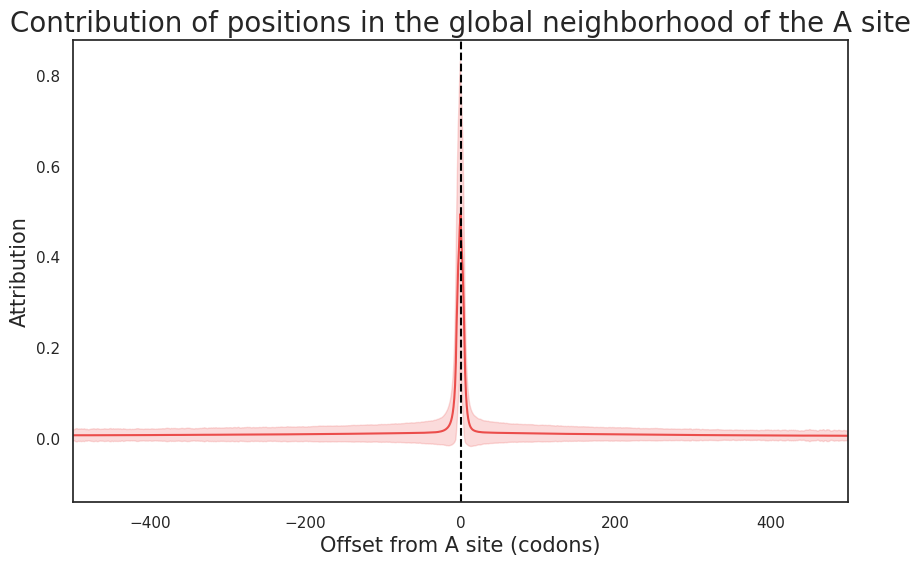

In [3]:
'''
Global Attribution Plot
'''
# make line plot with seaborn
# set size of plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_distCodonAttr['Distance from A Site'], y=df_distCodonAttr['Attribution Mod'], ci='sd', color='#eb4d4b')
# crop plot to only show relevant data from -500 to 500
plt.xlim(-500, 500)
# add vertical bar on x=0
plt.axvline(x=0, color='black', linestyle='--')
# x and y labels
plt.xlabel('Offset from A site (codons)', fontsize=15)
plt.ylabel('Attribution', fontsize=15)

plt.title('Contribution of positions in the global neighborhood of the A site', fontsize=20)
plt.savefig('final_plots/distance_vs_attribution_500Global.svg')
plt.savefig('final_plots/distance_vs_attribution_500Global.png')

plt.show()

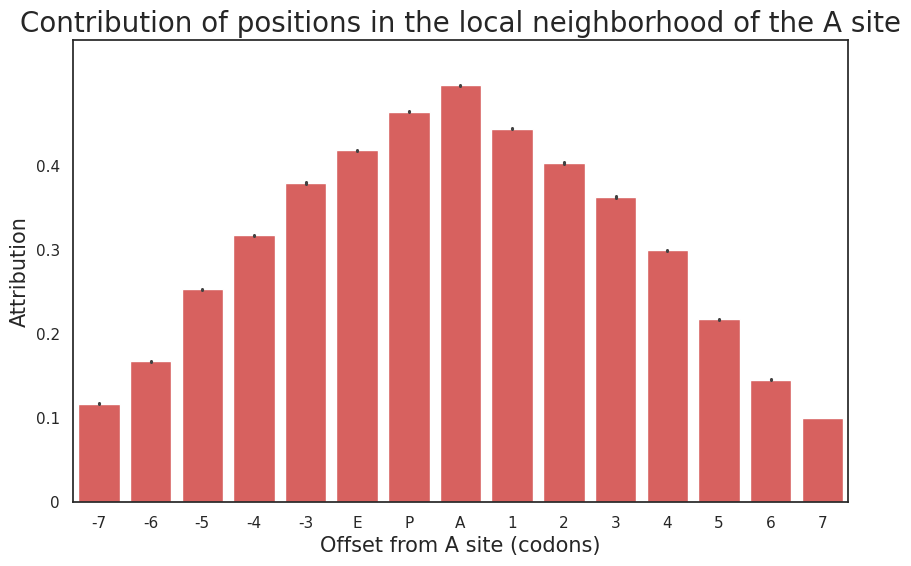

In [4]:
'''
local attribution plot from -7 to +7
'''

# box plot with seaborn from -7 to 7 
df_local = df_distCodonAttr[(df_distCodonAttr['Distance from A Site'] >= -7) & (df_distCodonAttr['Distance from A Site'] <= 7)]
plt.figure(figsize=(10, 6))
# barplot for the values from -7 to 7
sns.barplot(x=df_local['Distance from A Site'], y=df_local['Attribution Mod'], color='#eb4d4b')
plt.ylim(0, 0.55)

plt.xlabel('Offset from A site (codons)', fontsize=15)
plt.ylabel('Attribution', fontsize=15)
# change x ticks to be from -7 to 7
plt.xticks(range(0, 15), ['-7', '-6', '-5', '-4', '-3', 'E', 'P', 'A', '1', '2', '3', '4', '5', '6', '7'])
# change y ticks to remove the last value, make that blank
plt.yticks(np.arange(0, 0.6, 0.1), ['0', '0.1', '0.2', '0.3', '0.4', ''])
# plot title
plt.title('Contribution of positions in the local neighborhood of the A site', fontsize=20)
plt.savefig('final_plots/distance_vs_attribution_barALocal.svg')
plt.savefig('final_plots/distance_vs_attribution_barALocal.png')

plt.show()

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [5]:
'''
make codon wise attribution plot
'''

# convert codon column to list
# df['Codon'] = df['Codon'].apply(lambda x: x[1:-1].split(','))

# only take positions -5 to 5
df_localCodon = df_distCodonAttr[(df_distCodonAttr['Distance from A Site'] >= -5) & (df_distCodonAttr['Distance from A Site'] <= 5)]

# remove codon with len>3
df_localCodon = df_localCodon[df_localCodon['Codon'].apply(lambda x: len(x) == 3)]

# codon to int dictionary
codon_to_id = {
    'GCG': 0,
    'GCA': 1,
    'GCC': 2,
    'GCT': 3,
    'TGT': 4,
    'TGC': 5,
    'GAC': 6,
    'GAT': 7,
    'GAG': 8,
    'GAA': 9,
    'TTT': 10,
    'TTC': 11,
    'GGC': 12,
    'GGT': 13,
    'GGA': 14,
    'GGG': 15,
    'CAT': 16,
    'CAC': 17,
    'ATC': 18,
    'ATA': 19,
    'ATT': 20,
    'AAG': 21,
    'AAA': 22,
    'TTA': 23,
    'TTG': 24,
    'CTT': 25,
    'CTA': 26,
    'CTC': 27,
    'CTG': 28,
    'ATG': 29,
    'AAC': 30,
    'AAT': 31,
    'CCT': 32,
    'CCC': 33,
    'CCA': 34,
    'CCG': 35,
    'CAG': 36,
    'CAA': 37,
    'CGG': 38,
    'AGA': 39,
    'CGA': 40,
    'AGG': 41,
    'CGC': 42,
    'CGT': 43,
    'TCT': 44,
    'TCC': 45,
    'TCA': 46,
    'TCG': 47,
    'AGT': 48,
    'AGC': 49,
    'ACT': 50,
    'ACG': 51,
    'ACC': 52,
    'ACA': 53,
    'GTA': 54,
    'GTC': 55,
    'GTT': 56,
    'GTG': 57,
    'TGG': 58,
    'TAC': 59,
    'TAT': 60,
    'TAA': 61,
    'TGA': 62,
    'TAG': 63
}

id_to_codon = {v:k for k,v in codon_to_id.items()}

# convert codon to int
codon_list = list(df_localCodon['Codon'])
codonintlist = []
for codon in codon_list:
    codonintlist.append(codon_to_id[codon])
df_localCodon['CodonInt'] = codonintlist
# drop codon column
df_localCodon = df_localCodon.drop('Codon', axis=1)
df_localCodon = df_localCodon.drop('Unnamed: 0', axis=1)

# make a heatmap with seaborn, with the mean attribution for each codon at each position    
df_localCodon = df_localCodon.groupby(['Distance from A Site', 'CodonInt']).mean().reset_index()
# make a table 15 x 64 with the mean attribution for each codon at each position
df_table = df_localCodon.pivot(index='Distance from A Site', columns='CodonInt', values='Attribution')
plt.figure(figsize=(40, 10))
# make a heatmap with seaborn using the table
# cmap negative with red, positive with blue
# print full df_table
# save df table
df_table.to_csv('df_table.csv')
# impute nans to 0
df_table = df_table.fillna(0)
# invert the y axis
df_table = df_table.iloc[::-1]

# remove last three rows
df_table = df_table.iloc[:,:-3]

ax = sns.heatmap(df_table, cmap='coolwarm', center=0, cbar_kws={'label': ''}, square=True, annot_kws={"size": 40})
ax.figure.axes[-1].yaxis.label.set_size(40)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=25)
plt.xlabel('', fontsize=40)
plt.ylabel('Offset from A site (codons)', fontsize=40)
plt.title('Contribution of codons in different positions around the A site', fontsize=40)

# flip y axis
# change y axis 
plt.yticks(range(0, 11), ['5', '4', '3', '2', '1', 'A', 'P', 'E', '-3', '-4', '-5'], fontsize=30, va='top', rotation=0)

codon_to_aa = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',                
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
        'NNG':'R', 'NNC':'T', 'NGT':'S', 'NGA':'R',
        'NNT':'Y', 'NGC':'S'
    }

# group codons by amino acid and order the x ticks
aa_list = []
codon_list = []
for i in range(61):
    aa_list.append(codon_to_aa[id_to_codon[i]])
    codon_list.append(id_to_codon[i])

plt.xticks(range(0, 61), codon_list, rotation=90, fontsize=30, ha='left')

plt.savefig('final_plots/distance_vs_attribution_heatmapCodon.png')
plt.show()

KeyError: "['Unnamed: 0'] not found in axis"